<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>



# Laboratorio de Codificación de Variables Categóricas

AutoRenew, la empresa líder en la venta de coches de segunda mano, continúa con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Hasta ahora, has realizado un análisis exploratorio, gestionado los valores nulos y tratado los outliers en el conjunto de datos. El siguiente paso en el proceso de preprocesamiento es manejar las variables categóricas para que el modelo de machine learning pueda interpretarlas correctamente.

En este laboratorio, te centrarás en la **codificación de variables categóricas**. Dado que los modelos de machine learning requieren datos numéricos para funcionar, es crucial convertir las variables categóricas en un formato que los algoritmos puedan procesar. Trabajarás con el mismo conjunto de datos que has utilizado en los laboratorios anteriores, enfocándote ahora en transformar las columnas categóricas de manera efectiva.

**Instrucciones:**

1. **Identificación de Variables Categóricas:** Revisa el conjunto de datos e identifica las columnas que contienen variables categóricas. Estas son las columnas que contienen texto o categorías que necesitan ser transformadas en valores numéricos para ser utilizadas en el modelo de machine learning.

2. **Selección de Técnicas de Codificación:** Decide qué técnica(s) de codificación aplicar a cada variable categórica. Algunas de las opciones que tienes son:

   - **Label Encoding:** Asigna un número único a cada categoría dentro de una variable.

   - **One-Hot Encoding:** Crea nuevas columnas binarias (0/1) para cada categoría única en una variable.

   - **Target Encoding:** Utiliza la media del target (en este caso, el `price`) para codificar las categorías, si consideras que podría ser útil.

3. **Aplicación de la Codificación:** Implementa las técnicas seleccionadas en las variables categóricas. Asegúrate de revisar cómo estas transformaciones afectan el conjunto de datos y de mantener un registro de los cambios realizados.

4. **Verificación del Conjunto de Datos Transformado:** Una vez que hayas aplicado la codificación, verifica que el conjunto de datos resultante esté listo para ser utilizado en el modelo de machine learning. Asegúrate de que no queden variables categóricas sin codificar y que la estructura del conjunto de datos sea adecuada para el análisis.

**Nota:** Este laboratorio es parte de una serie continua en la que utilizas el mismo conjunto de datos a lo largo de la semana. Documenta bien los pasos que sigas, ya que esta codificación será clave para los modelos que desarrollarás más adelante.



In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import numpy as np

# Para la visualización 
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Otros objetivos
# -----------------------------------------------------------------------
import math
from itertools import combinations

# Para pruebas estadísticas
# -----------------------------------------------------------------------
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 

from src import Asunciones as sas
from src import soporte_preprocesamiento as sp
from src import soporte_encoding as se

from category_encoders import TargetEncoder

## Modelo #3: segmentación por precio de vehículo

In [9]:
df = pd.read_csv("datos/outliersNum.csv", index_col=0)

In [85]:
df.tail(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,model,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,kilometer_robust,powerCV_robust
330611,2016-03,Suche_t4___vito_ab_6_sitze,private,offer,2200.0,test,Sin informacion,Moderno,Sin informacion,Sin informacion,1.0,Sin informacion,sonstige_autos,Sin informacion,2016-03,2016-04,-2.6,0.152152
330612,2016-03,Smart_smart_leistungssteigerung_100ps,private,offer,1199.0,test,convertible,Moderno,automatic,fortwo,3.0,petrol,smart,no,2016-03,2016-03,-0.5,-0.349230
330613,2016-03,Volkswagen_Multivan_T4_TDI_7DC_UY2,private,offer,9200.0,test,bus,Clásico,manually,transporter,3.0,diesel,volkswagen,no,2016-03,2016-04,0.0,-0.332281
330614,2016-03,VW_Golf_Kombi_1_9l_TDI,private,offer,3400.0,test,combi,Moderno,manually,golf,6.0,diesel,volkswagen,Sin informacion,2016-03,2016-03,0.0,-0.366179
330615,2016-03,BMW_M135i_vollausgestattet_NP_52.720____Euro,private,offer,28990.0,control,Sin informacion,Moderno,manually,m_reihe,8.0,petrol,bmw,no,2016-03,2016-03,-2.0,3.311787


Dado que queremos tratar los meses como variables categóricas, los transformamos a str.

In [10]:
df['monthOfRegistration'] = df['monthOfRegistration'].astype(str)

Tras realizar un segundo modelo, hemos detectado que el error es muy alto al evaluar los coches únicamente de estilo SUV. En esta tercera iteración, intentaremos predecir únicamente los precios de los vehículos con precio entre 10000 y 15000 unidades monetarias. Para ello, filtraremos el DF y analizaremos luego los value counts de cada columna, para determinar con cuáles nos quedaremos para el análisis.

In [11]:
df = df[(df["price"] >= 10000) & (df["price"] <= 15000)]

In [12]:
df.shape

(28588, 18)

Nos quedamos así con un DF de casi 29 mil registros.

In [89]:
for column in df.select_dtypes(include="O").columns:
    print(f"Columna '{column}':")
    print(df[column].value_counts())
    print("\n")

Columna 'dateCrawled':
dateCrawled
2016-03    11665
2016-04     2250
Name: count, dtype: int64


Columna 'name':
name
Mercedes_Benz_ML_270_CDI                                     83
Volkswagen_Tiguan_2.0_TDI_DPF_4Motion_Sport_&_Style          55
Mercedes_Benz_ML_320_CDI_4Matic_7G_TRONIC_DPF                51
Mercedes_Benz_ML_320_CDI_4Matic_7G_TRONIC                    50
Mercedes_Benz_ML_320                                         47
                                                             ..
VW_Iltis_24_V_Ausfuehrung                                     1
Porsche_Cayenne_Turbo_Tuev_Neu                                1
Toyota_RAV_4_4x4___Rechtslenker__Neu_TÜV__HU_4/2018           1
Volkswagen_Touareg_3.2_V6_Automatik_103´km_Vollleder_Navi     1
Hyundai_ix35_1.7_CRDi_2WD_Fifa_World_Cup_Edition              1
Name: count, Length: 9314, dtype: int64


Columna 'seller':
seller
private    13915
Name: count, dtype: int64


Columna 'offerType':
offerType
offer    13915
Name: count, dtype: 

Eliminaremos las columnas "name" y "model", por contener 9314 y 117 registros únicos, así como "seller" y "offerType", que en una de las categorías contienen entre 2 y 5 registros. "lastSeen" la eliminaremos por contener los mismos registros que "dateCrawled". En todos los casos, por su variabilidad mínima o extrema, inducirán a error al modelo. Eliminaremos finalmente "vehicleType", por cuanto ahora contiene un mismo dato en todas las filas.

In [90]:
df["name"].nunique()

9314

In [91]:
df["model"].nunique()

117

In [92]:
df.drop(columns=["name","vehicleType","model","seller","offerType","lastSeen"], inplace=True)

Creamos una variable con una lista de variables categóricas.

In [93]:
lista_col_categ = df.select_dtypes(include="O").columns.tolist()
lista_col_categ

['dateCrawled',
 'abtest',
 'yearOfRegistration',
 'gearbox',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated']

Y usaremos herramientas de visualización para las variables categóricas.

In [94]:
visualizador = sp.Visualizador(df)

In [95]:
visual_encoding = se.Analisis_Visual_Encoding(df, lista_col_categ, "price")

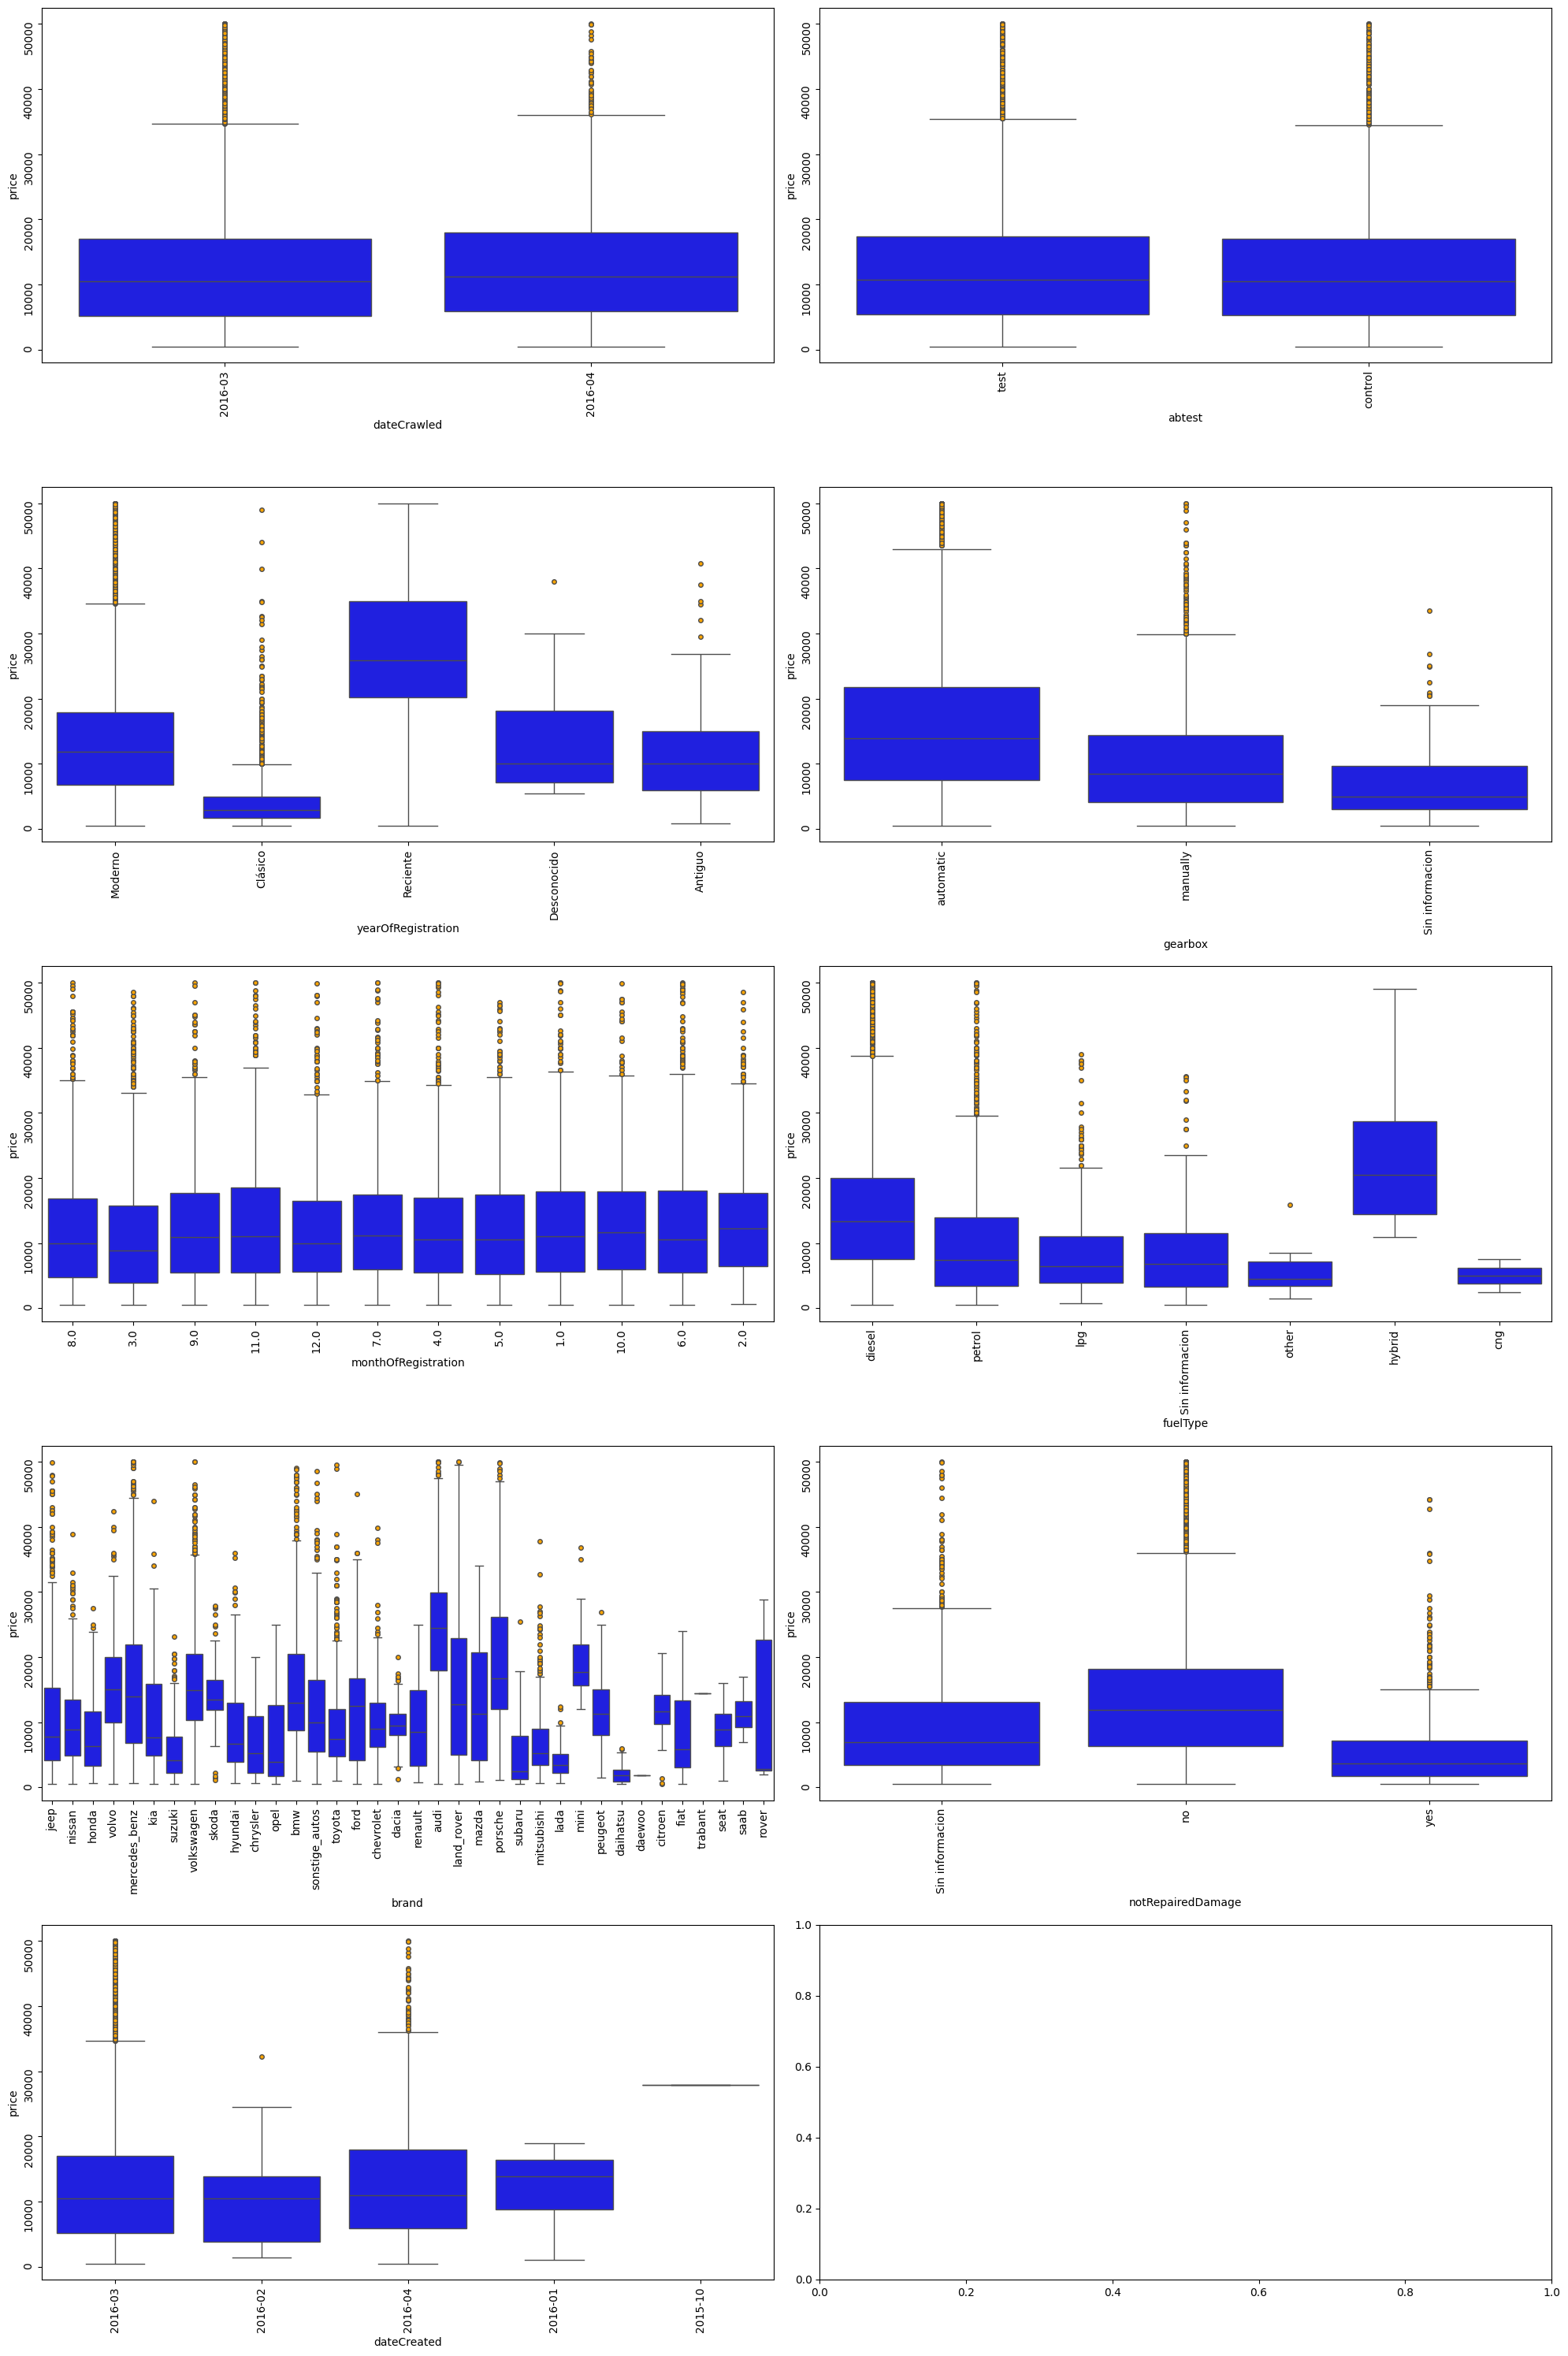

In [96]:
visual_encoding.crear_boxplot(tamano_grafica=(20, 30))

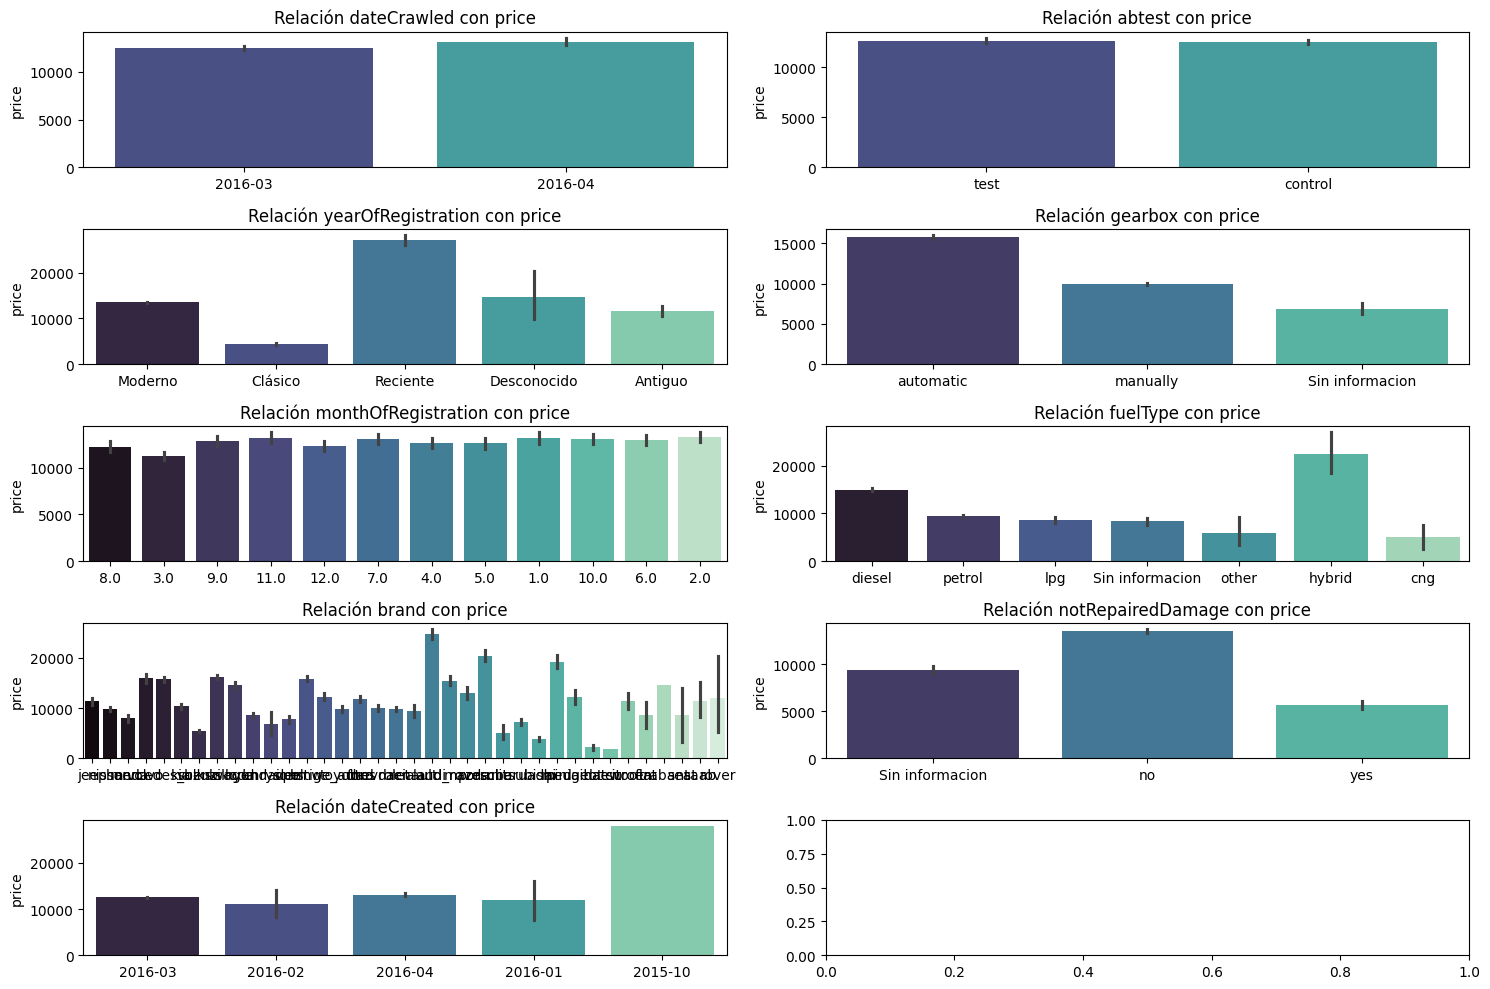

In [97]:
se.visualizar_categorias(df, lista_col_categ, "price", tipo_grafica="barplot")

In [98]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = se.Asunciones(dataframe = df, columna_numerica = "price")
print("\n-------------\n")

for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

#    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable DATECRAWLED
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable dateCrawled las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['2016-03', '2016-04']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 12492050.5
Valor p: 0.0002977042899612088
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,645.6566,0.0026,225.4018,1065.9114,2016-03-2016-04



###########################

Estamos analizando la variable ABTEST
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable abtest las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['test', 'control']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 24288213.5
Valor p: 0.5999829990837791
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable YEAROFREGISTRATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable yearOfRegistration las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Moderno', 'Clásico', 'Reciente', 'Desconocido', 'Antiguo']

Realizando test de Kruskal...
Estadístico de prueba: 3074.543555930866
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-7136.7583,0.0000,-8934.5872,-5338.9294,Antiguo-Clásico
2,1925.9665,0.0203,195.1271,3656.8059,Antiguo-Moderno
3,15553.9719,0.0000,13469.1177,17638.8261,Antiguo-Reciente
4,10175.1178,0.0001,3994.1216,16356.1141,Clásico-Desconocido
5,9062.7248,0.0000,8489.1276,9636.3219,Clásico-Moderno
6,22690.7302,0.0000,21394.6494,23986.8111,Clásico-Reciente
8,12515.6124,0.0000,6245.1146,18786.1102,Desconocido-Reciente
9,13628.0055,0.0000,12426.5722,14829.4387,Moderno-Reciente



###########################

Estamos analizando la variable GEARBOX
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable gearbox las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['automatic', 'manually', 'Sin informacion']

Realizando test de Kruskal...
Estadístico de prueba: 1316.471595552091
Valor p: 1.3546441775491065e-286
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,8826.4251,0.0,7618.4489,10034.4014,Sin informacion-automatic
1,3067.5372,0.0,1861.0251,4274.0492,Sin informacion-manually
2,-5758.8879,0.0,-6113.7649,-5404.0110,automatic-manually



###########################

Estamos analizando la variable MONTHOFREGISTRATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable monthOfRegistration las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['8.0', '3.0', '9.0', '11.0', '12.0', '7.0', '4.0', '5.0', '1.0', '10.0', '6.0', '2.0']

Realizando test de Kruskal...
Estadístico de prueba: 96.8574224071861
Valor p: 7.467482837076373e-16
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
4,-1899.3700,0.0000,-3063.7230,-735.0169,1.0-3.0
14,-1839.3231,0.0000,-2991.9864,-686.6597,10.0-3.0
23,-1937.6196,0.0000,-3076.7454,-798.4938,11.0-3.0
38,-1989.6375,0.0000,-3224.0950,-755.1800,2.0-3.0
45,1394.3601,0.0036,256.7531,2531.9670,3.0-4.0
46,1337.1361,0.0090,178.2053,2496.0669,3.0-5.0
47,1701.9166,0.0000,582.8160,2821.0171,3.0-6.0
48,1792.2837,0.0000,675.3812,2909.1862,3.0-7.0
50,1563.9247,0.0007,396.4615,2731.3879,3.0-9.0



###########################

Estamos analizando la variable FUELTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable fuelType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['diesel', 'petrol', 'lpg', 'Sin informacion', 'other', 'hybrid', 'cng']

Realizando test de Kruskal...
Estadístico de prueba: 1549.173649412379
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
1,6694.8881,0.0000,5338.8750,8050.9012,Sin informacion-diesel
2,14225.9301,0.0000,8235.6033,20216.2569,Sin informacion-hybrid
11,7531.0420,0.0028,1681.8243,13380.2597,diesel-hybrid
12,-6401.0828,0.0000,-7519.5037,-5282.6618,diesel-lpg
14,-5615.5196,0.0000,-6091.4967,-5139.5424,diesel-petrol
15,-13932.1248,0.0000,-19873.1776,-7991.0719,hybrid-lpg
16,-16643.2000,0.0001,-27572.6343,-5713.7657,hybrid-other
17,-13146.5616,0.0000,-19000.7735,-7292.3496,hybrid-petrol



###########################

Estamos analizando la variable BRAND
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable brand las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['jeep', 'nissan', 'honda', 'volvo', 'mercedes_benz', 'kia', 'suzuki', 'volkswagen', 'skoda', 'hyundai', 'chrysler', 'opel', 'bmw', 'sonstige_autos', 'toyota', 'ford', 'chevrolet', 'dacia', 'renault', 'audi', 'land_rover', 'mazda', 'porsche', 'subaru', 'mitsubishi', 'lada', 'mini', 'peugeot', 'daihatsu', 'daewoo', 'citroen', 'fiat', 'trabant', 'seat', 'saab', 'rover']

Realizando test de Kruskal...
Estadístico de prueba: 3243.709816922596
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-8825.0269,0.0,-10705.8206,-6944.2331,audi-bmw
1,-14720.2245,0.0,-16988.7956,-12451.6533,audi-chevrolet
2,-17976.4856,0.0,-25263.8244,-10689.1469,audi-chrysler
3,-13299.8285,0.0,-18906.7410,-7692.9160,audi-citroen
4,-14910.4969,0.0,-17607.1783,-12213.8154,audi-dacia
...,...,...,...,...,...
620,4412.6308,0.0,2557.8126,6267.4489,suzuki-toyota
622,10692.1658,0.0,9286.6068,12097.7248,suzuki-volkswagen
623,10485.2999,0.0,8155.2363,12815.3634,suzuki-volvo
625,6279.5350,0.0,4642.6576,7916.4125,toyota-volkswagen



###########################

Estamos analizando la variable NOTREPAIREDDAMAGE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable notRepairedDamage las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Sin informacion', 'no', 'yes']

Realizando test de Kruskal...
Estadístico de prueba: 1133.2146797378148
Valor p: 8.424786213143625e-247
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,4167.6883,0.0,3574.7056,4760.6709,Sin informacion-no
1,-3751.0905,0.0,-4659.8338,-2842.3473,Sin informacion-yes
2,-7918.7788,0.0,-8661.5777,-7175.9799,no-yes



###########################

Estamos analizando la variable DATECREATED
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable dateCreated las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['2016-03', '2016-02', '2016-04', '2016-01', '2015-10']

Realizando test de Kruskal...
Estadístico de prueba: 14.78578176523423
Valor p: 0.005166778707695593
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
9,620.2255,0.0325,32.6125,1207.8386,2016-03-2016-04



###########################



In [99]:
df.columns

Index(['dateCrawled', 'price', 'abtest', 'yearOfRegistration', 'gearbox',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'kilometer_robust', 'powerCV_robust'],
      dtype='object')

In [100]:
# definimos un diccionario con los distintos tipos de encoding y las columnas que irán asociadas a cada uno de ellos. 

diccionario_encoding = {"onehot": [], # no metemos ninguna columna porque todas nuestras columnas tienen orden
                        "dummies": [], # no metemos ninguna columna porque todas tienen orden
                        'ordinal' : [],
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": {
                                    'dateCrawled': ['2016-03', '2016-04'],
                                    'abtest': ['test', 'control'],
                                    'yearOfRegistration': ['Moderno', 'Clásico', 'Reciente', 'Antiguo', 'Desconocido'],
                                    'gearbox': ['manually', 'automatic', 'Sin informacion'],
                                    'monthOfRegistration': ['5.0', '8.0', '6.0', '7.0', '10.0', '3.0', '12.0', '11.0', '2.0', '1.0', '4.0', '9.0'],
                                    'fuelType': ['diesel', 'petrol', 'Sin informacion', 'lpg', 'other', 'hybrid', 'cng', 'electro'],
                                    'brand': ['audi', 'jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai', 'seat', 'subaru', 'volvo', 'mitsubishi', 'alfa_romeo', 'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet', 'sonstige_autos', 'dacia', 'daihatsu', 'chrysler', 'jaguar', 'daewoo', 'rover', 'saab', 'trabant', 'land_rover', 'lada'],
                                    'notRepairedDamage': ['yes', 'Sin informacion', 'no'],
                                    'dateCreated': ['2016-03', '2016-04', '2016-02', '2016-01', '2015-03', '2015-06', '2015-11', '2015-12', '2014-03', '2015-09', '2015-08', '2015-10']
                                    }, # no metemos ninguna columna porque no coincide el orden del value counts con las categorias y la variable respuesta
                        "target": []
                        }

In [101]:
encoding = se.Encoding(df, diccionario_encoding, df.select_dtypes("O").columns, "price")

In [102]:
targ_enc = encoding.target_encoding()

In [103]:
targ_enc.reset_index(inplace=True, drop=True)

In [104]:
targ_enc

,dateCrawled,price,abtest,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,kilometer_robust,powerCV_robust
0,12522.591856,9800.0,12682.949572,13501.749804,15716.688946,12202.868756,15012.157985,11337.660690,9389.084840,12530.048494,-0.5,0.684668
1,12522.591856,17999.0,12566.332784,13501.749804,9957.801001,11245.888650,15012.157985,9760.303502,13556.773103,12530.048494,-1.6,1.125346
2,12522.591856,2100.0,12566.332784,13501.749804,9957.801001,12202.868756,9396.638413,7922.251179,13556.773103,11493.613352,0.0,-0.281433
3,12522.591856,8000.0,12682.949572,13501.749804,9957.801001,12202.868756,15012.157985,15913.048192,9389.084840,12530.048494,0.0,1.040601
4,12522.591856,41900.0,12566.332784,13501.749804,15716.688946,12809.813321,15012.157985,15699.755312,13556.773103,12530.048494,-2.2,1.362635
...,...,...,...,...,...,...,...,...,...,...,...,...
13910,13168.248444,32900.0,12682.949572,27129.755263,15716.688946,12809.813321,15012.157985,13021.819577,13556.773103,13150.274034,1.6,1.040601
13911,12522.591856,44900.0,12682.949572,13501.749804,15716.688946,11245.888650,15012.157985,15699.755312,13556.773103,12530.048494,-1.0,2.972804
13912,12522.591856,6300.0,12682.949572,13501.749804,15716.688946,13145.258605,8611.075214,15699.755312,13556.773103,12530.048494,0.0,1.599923
13913,12522.591856,16500.0,12566.332784,13501.749804,9957.801001,12809.813321,15012.157985,8665.589226,13556.773103,12530.048494,-2.4,-0.111942


- Nos quedaremos con el target encoding, y almacenamos los resultados con los que realizaremos las predicciones.

In [105]:
targ_enc.to_csv("datos/target_encoding.csv")